# Problema de Fuerza Centrales: Campo Relativista

In [67]:
from numpy import *
from matplotlib import pyplot as plt,animation
from scipy.integrate import odeint
from scipy.optimize import minimize
%matplotlib nbagg

# Constantes
RAD=180/pi
DEG=pi/180
g=9.8

# Potenciales y Fuerzas

In [108]:
def U(r,params):
    mu=params["mu"]
    h=params["h"]
    Rs=params["Rs"]
    Upot=-mu/r-Rs*h**2/2*mu/r**3
    return Upot

def Ueff(r,params):
    h=params["h"]
    Upot=U(r,params)+h**2/(2*r**2)
    return Upot

def iUeff(r,params):
    if r<0 or r<1 or r>10:
        Upot=0
    else:
        Upot=-Ueff(r,params)
    return Upot

# Gráfica de Potenciales

<IPython.core.display.Javascript object>


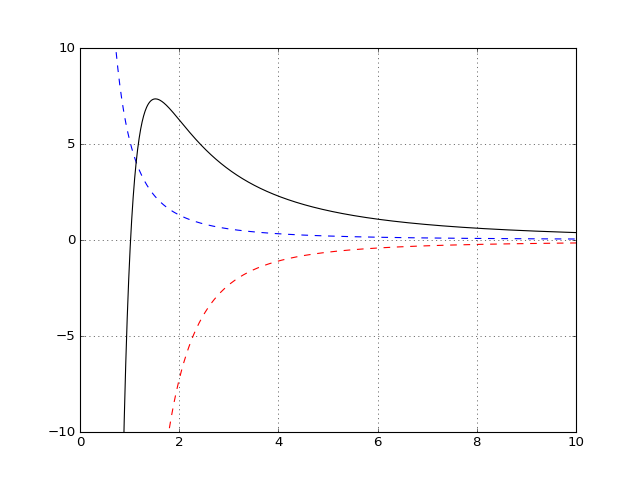

In [114]:
fig=plt.figure()
ax=fig.gca()

rs=linspace(1e-3,10,1000)

params=dict(mu=1,h=10.4,Rs=1.0)
ax.plot(rs,U(rs,params),'r--')
ax.plot(rs,params["h"]/(2*rs**2),'b--')
ax.plot(rs,Ueff(rs,params),'k-')

Umax=10
ax.set_ylim((-Umax,+Umax))
ax.grid()

# Órbitas Circulares

In [115]:
solution=minimize(Ueff,[1.0],args=(params,))
if solution["success"]:
    rcirc=solution["x"][0]
    print "Stable circular orbit at r = ",rcirc
else:
    print "No stable circular orbit"

solution=minimize(iUeff,[2.0],args=(params,))
if solution["success"]:
    rcirc=solution["x"][0]
    print "Unstable circular orbit at r = ",rcirc
else:
    print "No unstable circular orbit"

No stable circular orbit
Unstable circular orbit at r =  1.52140036447
